In [1]:
from dmml_project.models.create_model import create_model
import sklearn.metrics as metrics
from dmml_project.models.model import Model
from dmml_project import PROJECT_ROOT
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/crowdflower.tsv")
model: Model = create_model(kind="random_forest", criterion="gini", min_impurity_decrease=1e-12, n_estimators=1000, n_jobs=-1)

In [2]:
train, valid = dataset.fold(0, 5)
model.train(train)
accuracy, cm = model.evaluate(valid, metric=lambda pred, true: (metrics.accuracy_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

KeyboardInterrupt: 

Accuracy: 29.36%


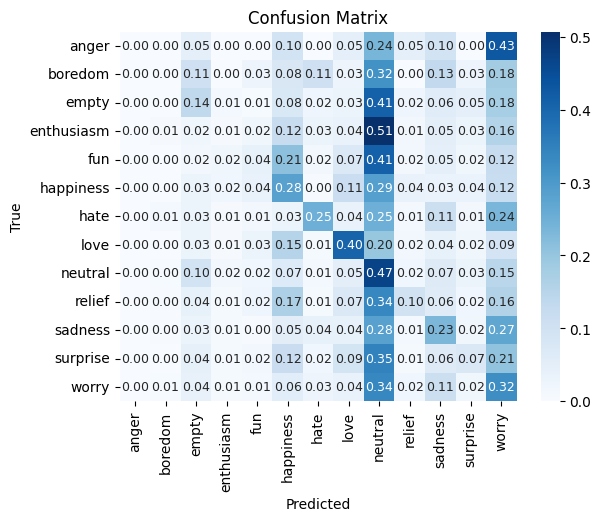

In [ ]:
print(f"Accuracy: {accuracy*100:.2f}%")
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9})
classes = model.classes()
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=90)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()